In [2]:
import pandas as pd
import numpy as np
from scipy.stats import norm, lognorm, ksone
import matplotlib.pyplot as plt

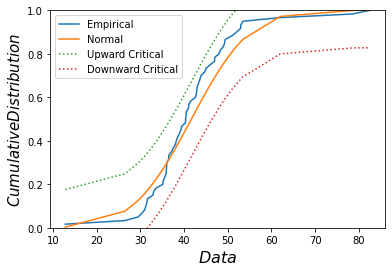

In [29]:
class KolmogrovSmirnov:

    def __init__(self,X,alpha):
        self.X = np.sort(np.array(X))
        self.alpha = alpha
        self.make_dataframe()
        self.figure = plt

    def make_dataframe(self):
        rank = np.linspace(1, len(self.X),len(self.X))
        Ex = np.array(rank/len(self.X))
        normal_cumulative = self.get_normal_cumulative()
        log_normal_cumulative = self.get_log_normal_cumulative()
        D_normal = abs(normal_cumulative-Ex)
        D_log_normal = abs(log_normal_cumulative-Ex)
        self.dataframe = pd.DataFrame(
            data={"Data":self.X,
            "Rank":rank,
            "E":Ex,
            "Normal Cumulative":normal_cumulative,
            "Log-Normal Cumulative":log_normal_cumulative,
            "D Normal":D_normal,
            "D Log-Normal":D_log_normal
            }
        )
        self.D_log_normal = max(D_log_normal)
        self.D_normal = max(D_normal)
        self.get_D_critical()
        
    def get_D_critical(self):
        self.D_critical = ksone.ppf(1-self.alpha/2,np.size(self.X))
        return self.D_critical
    def get_normal_cumulative(self):
        normal_dist = norm(np.mean(self.X),np.std(self.X))
        return np.array(list(map(normal_dist.cdf,self.X)))

    def get_log_normal_cumulative(self):
        mean = np.mean(self.X)
        std = np.std(self.X)
        mean_lognormal = np.log((mean**2)/(mean**2 + std**2)**0.5)
        variance_lognormal = np.log(1.0651698304343361)
        std_lognormal = variance_lognormal**0.5
        log_normal_dist = norm(loc=mean_lognormal,scale=std_lognormal)
        return np.array(list(map(log_normal_dist.cdf,np.log(self.X))))

    def get_dataframe(self):
        return self.dataframe
    
    def plot_empirical(self):
        self.figure.plot(self.X, self.dataframe.E, label="Empirical")
    
    def plot_normal(self):
        self.figure.plot(self.X, self.dataframe["Normal Cumulative"], label="Normal")
    
    def plot_D_upward(self):
        self.figure.plot(self.X, self.dataframe["Normal Cumulative"]+self.get_D_critical(), label="Upward Critical", linestyle=":")

    def plot_D_downward(self):
        self.figure.plot(self.X, self.dataframe["Normal Cumulative"]-self.get_D_critical(), label="Downward Critical", linestyle=":")
    
    def plot_all(self):
        self.plot_empirical()
        self.plot_normal()
        self.plot_D_upward()
        self.plot_D_downward()
        self.figure.xlabel("$Data$",fontsize=16)
        self.figure.ylabel("$Cumulative Distribution$",fontsize=15)
        x1,x2,y1,y2 = self.figure.axis()  
        self.figure.axis((x1,x2,0,1))
        self.figure.legend()
    
dataframe = pd.read_csv("../sample_data.csv")
data = dataframe["data"]
KS = KolmogrovSmirnov(data,0.05)
KS.plot_all()